In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [3]:
train_data=pd.read_excel(r"C:\ML Projects\Flight fare prediction\Data_train.xlsx")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 40m      1
29h 10m      1
30h 15m      1
27h 30m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [12]:
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
train_data['dep_hour']= pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['dep_min']= pd.to_datetime(train_data['Dep_Time']).dt.minute

In [16]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
train_data['arv_hour']= pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['arv_min']= pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [19]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+ duration[i]
duration_hrs=[]
duration_min=[]
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
train_data['Duration_hrs']=duration_hrs
train_data['Duration_min']=duration_min

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# handling categorical data

In [32]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

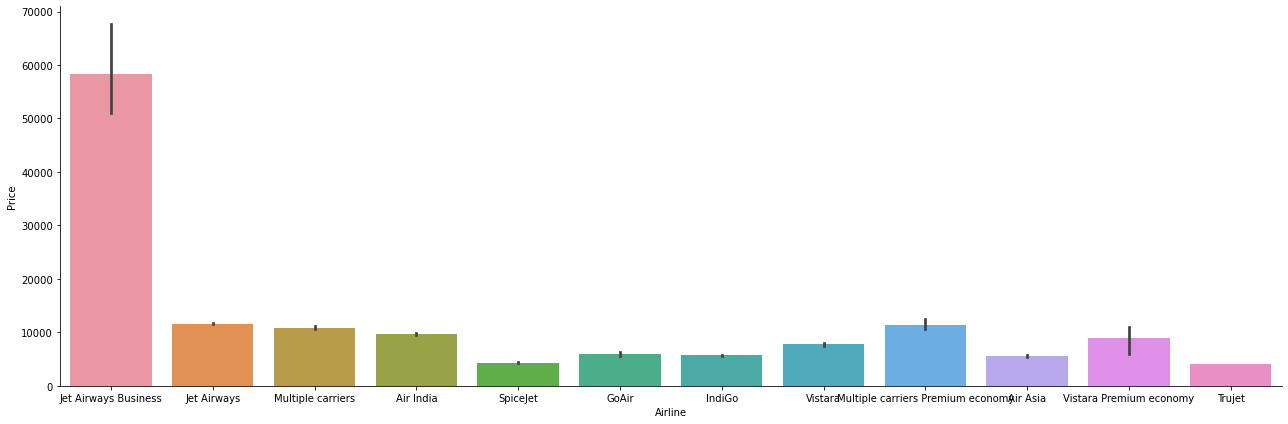

In [43]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values("Price",ascending=False),kind='bar', height=6,aspect=3)
plt.show()

## One hot Encoding of "Airline"

In [38]:
airline=train_data[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

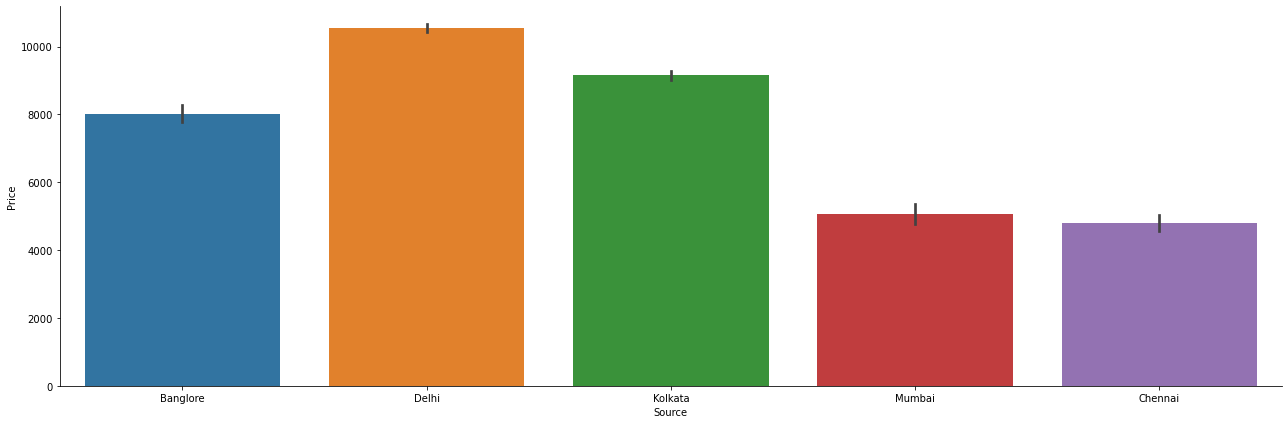

In [45]:
sns.catplot(y='Price',x='Source',data=train_data.sort_values("Price",ascending=False),kind='bar', height=6,aspect=3)
plt.show()

In [41]:
source=train_data[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

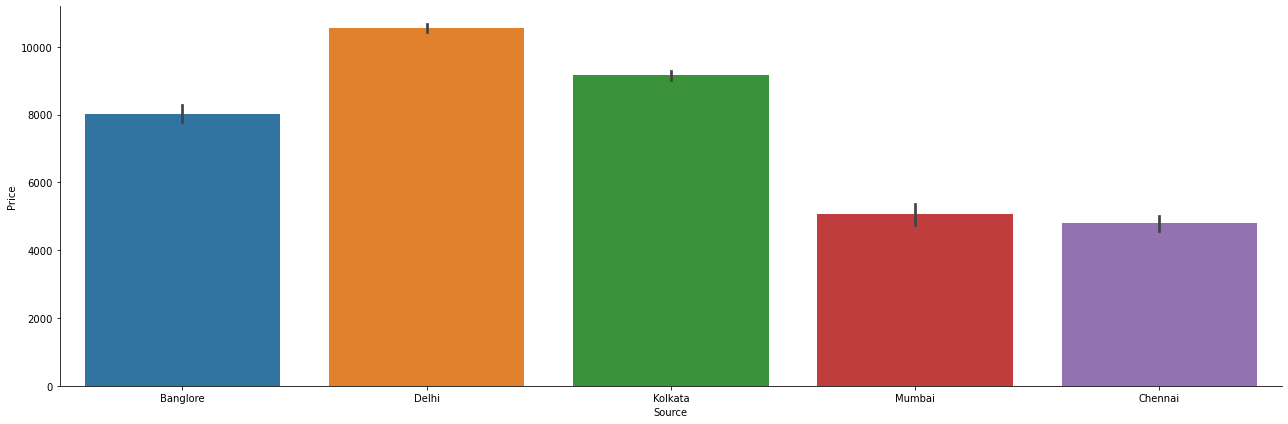

In [46]:
sns.catplot(y='Price',x='Source',data=train_data.sort_values("Price",ascending=False),kind='bar', height=6,aspect=3)
plt.show()

In [47]:
destination=train_data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [49]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [50]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [51]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [52]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [53]:
data_train=pd.concat([train_data,airline,source,destination],axis=1)

In [54]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
data_train.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [57]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
data_train.shape

(10682, 30)

# Test set

In [59]:
test_data=pd.read_excel(r"C:\ML Projects\Flight fare prediction\Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [60]:
test_data.shape

(2671, 10)

In [63]:
test_data['doj_mon']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_data['doj_day']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_mon,doj_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [65]:
test_data.drop(['Date_of_Journey'],axis=1, inplace=True)

In [66]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_mon,doj_day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [68]:
test_data['dep_hrs']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_mon,doj_day,dep_hrs,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [70]:
test_data['arv_hrs']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['arv_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55,2,45


In [71]:
test_data.drop(['Dep_Time','Arrival_Time'],axis=1, inplace=True)

In [72]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


In [73]:
test_data.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [74]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,6,24,23,55,2,45


In [75]:
duration=list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h'in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+ duration[i]
duration_hrs=[]
duration_min=[]
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))



In [76]:
test_data['duration_hrs']=duration_hrs
test_data['duration_min']=duration_min

In [77]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min,duration_hrs,duration_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,4h,1 stop,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,13h,1 stop,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,6,24,23,55,2,45,2,50


In [78]:
test_data.drop(['Duration'],axis=1, inplace=True)

In [79]:
test_data.head()

,Airline,Source,Destination,Total_Stops,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min,duration_hrs,duration_min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,6,24,23,55,2,45,2,50


# One-hot Encoding of Test data

In [81]:
source=test_data[['Source']]
source=pd.get_dummies(source,drop_first=True)
destination=test_data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
airline=test_data[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
print(source.head())
print(destination.head())
print(airline.head())

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             1               0              0
1               0             0               1              0
2               0             1               0              0
3               0             1               0              0
4               0             0               0              0
   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   1                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   1                  0                      0   
4                   0                  1                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0     

In [82]:
test_data.drop(['Source','Destination','Airline'],axis=1, inplace=True)
test_data.head()

,Total_Stops,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min,duration_hrs,duration_min
0,1 stop,6,6,17,30,4,25,10,55
1,1 stop,5,12,6,20,10,20,4,0
2,1 stop,5,21,19,15,19,0,23,45
3,1 stop,5,21,8,0,21,0,13,0
4,non-stop,6,24,23,55,2,45,2,50


In [88]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [89]:
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [90]:
data_test=pd.concat([test_data,source,destination,airline],axis=1)
data_test.head()

,Total_Stops,doj_mon,doj_day,dep_hrs,dep_min,arv_hrs,arv_min,duration_hrs,duration_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,17,30,4,25,10,55,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
data_test.shape

(2671, 28)

In [92]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arv_hour', 'arv_min', 'Duration_hrs', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [94]:
x=data_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arv_hour', 'arv_min', 'Duration_hrs', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arv_hour,arv_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [95]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

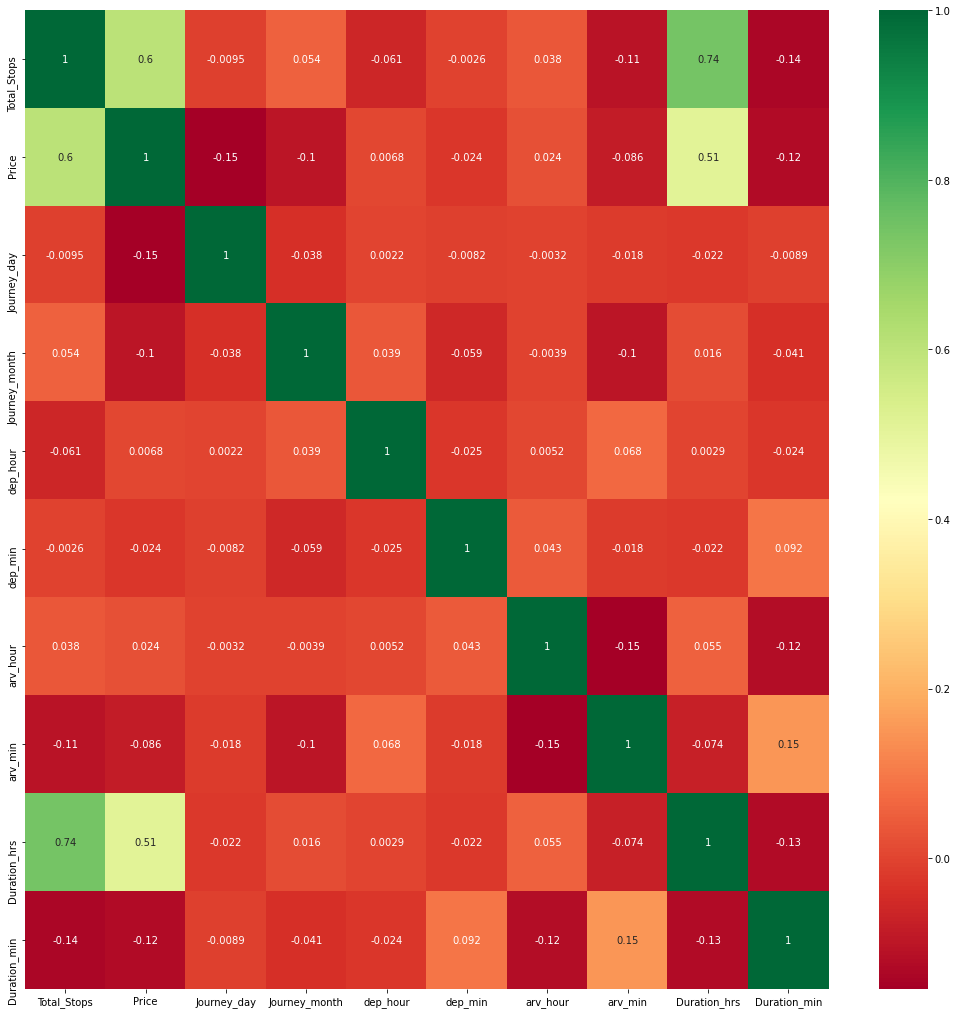

In [99]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

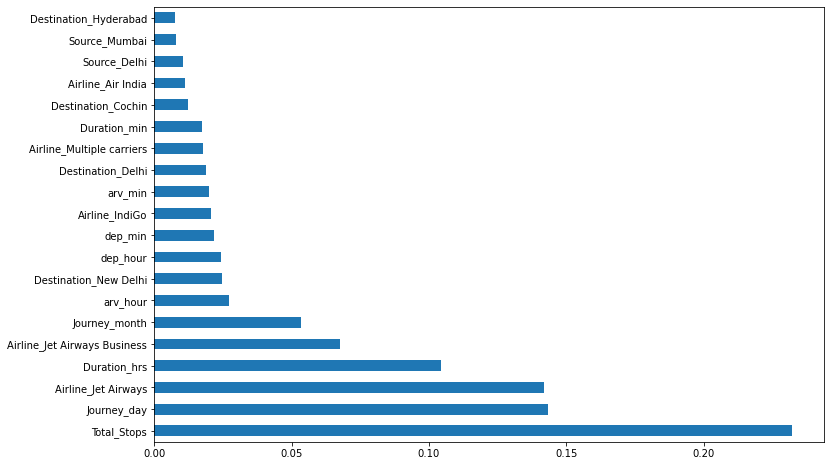

In [104]:
plt.figure(figsize=(12,8))
important_feat=pd.Series(selection.feature_importances_,index=x.columns)
important_feat.nlargest(20).plot(kind='barh')
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [106]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
y_pred=reg_rf.predict(x_test)

In [108]:
reg_rf.score(x_train,y_train)

0.955100677358705

In [109]:
reg_rf.score(x_test,y_test)

0.8043968574920541

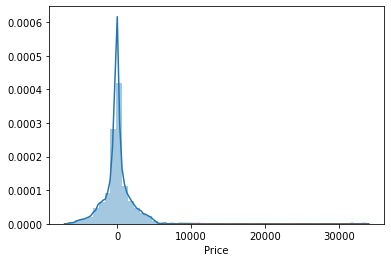

In [110]:
sns.distplot(y_test-y_pred)
plt.show()

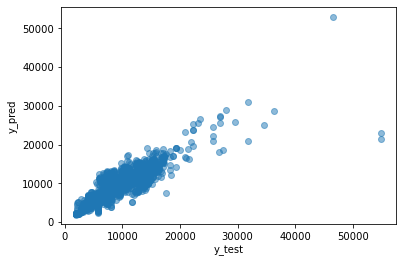

In [111]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [113]:
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE : 1197.1013453317726
MSE : 4226936.138187296
RMSE : 2055.951394899037


In [114]:
metrics.r2_score(y_test,y_pred)

0.8043968574920541

# Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split= [2,5,10,15,20]
min_samples_leaf= [1,2,5,10]

In [120]:
random_grid={'n_estimators': n_estimators, 'max_features':max_features,'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

In [121]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [122]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [123]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [124]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [125]:
prediction=rf_random.predict(x_test)

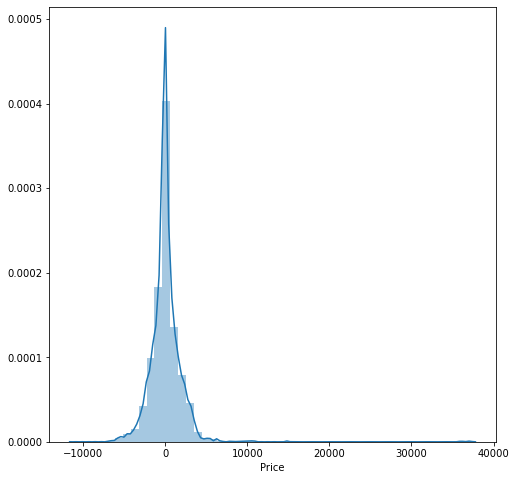

In [126]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

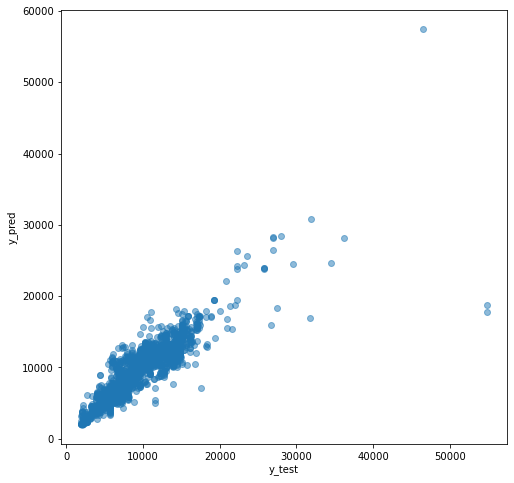

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [128]:
print("MAE :",metrics.mean_absolute_error(y_test,prediction))
print("MSE :",metrics.mean_squared_error(y_test,prediction))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 1170.497475664959
MSE : 4141449.2326605124
RMSE : 2035.0550932740157


# save the model to reuse it agian

In [134]:
import pickle
file=open('flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [135]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [136]:
y_prediction=forest.predict(x_test)

In [137]:
metrics.r2_score(y_test,y_prediction)

0.8083527978747943